# Age and Gender Prediction


<a name="Introduction"></a>
[INTRODUCTION](#Introduction)

The goal of this project is to create an **Age-Gender Predictor**. It was inspired by the [Age and Gender Classification Dataset of the Open University of Israel (Face Image Project)](http://www.openu.ac.il/home/hassner/projects/cnn_agegender/CNN_AgeGenderEstimation.pdf).
The intended goal of the project is to generate age gender on unseen face images.

The "Age and gender classification using convolutional neural networks" is a research paper related to the dataset above providing separately age or gender labels.


The main challenges are:
- **1- Find an age and gender labeled dataset to train our implementations :** Find dozen of face images from the internet with their correct age and gender is easy. But when you talk about several thousands of images, ***the task is very hard and expensive***. So, during our research we coincidently found the free ***Age and Gender Classification Dataset of the Open University of Israel (Face Image Project)*** which as 8 classes of age instead of 6 as in the original paper. ***A lot of thanks to them.***
- **2- Transform the dataset to reach our goals :** The Age and Gender Classification Dataset has some very good implementations in Tensorflow for Data preparation and tests. But they have a different goal, their implementation only performs seperate prediction of genders and ages. The goal here is to produce both prediction on each face image and try to outperform the accuracy. So, we should rewrite our own functions to reach our goals, using their annotations for the provided dataset. We need to match separate age and gender with their corresponding image ID and implement the prediction model.
- **3- Try our implementation on video and mobile app (Optional) :** It is not too hard to label pictures in video when we don't have to simultaneously deal with the audio too. But we could have some surprises sometime because of frameworks dependencies. Moreover, at this time (April 2017) we don't have enough ressources about the transformation process of Deep learning Frameworks projects into mobile apps. Run a Deep learning code in a notebook implementation and run it as mobile app are very different. Each framework has its constraints, no universal methods for this (crossplatform iOS-Android-Windows Mobile, several frameworks, etc.). 

The main steps of implementation are:
- **1- Data preparation :** create a dictionary of age and gender including all training set images
- **2- One-hot labels :** create a dictionary of age and gender including all training set images
- **3- Age and Gender Prediction :** create an ANN and train it with the prepared data to predict age and gender.
- **4- Mobile app implementation :** 

## Requirements
In the **import section** you will find all the required frameworks for the code to work. We mainly work with :

- **Tensorflow** and its advanced API **Tflearn**.
- **Python 2.x** and **Python 3.x** branches (You could run the notebook code where you want)


Below the Table of contents. We try to be as clear as possible for pedagogical reasons, so that newbies could also get what they need.
<a name="Table_of_Contents"></a>
# Table of Contents
- [Introduction](#Introduction)

- [I- Data preprocessing and visualization](#Data_Preprocessing_Visualization)
    - [I.1- Unified dataset extraction](#Unified_Dataset_Extraction)
    - [I.2- Training and Test sets creation](#Training_Test_Sets_Creation)


- [II- Age and Gender Prediction](#Age_Gender_Prediction)
    - [II.1- Build the Artificial Neural Network (ANN) Model](#ANN_Model)
      - [II.1.1- With TFLearn](#ANN_Model_TFlearn)
      - [II.1.2- With Tensorflow](#ANN_Model_Tensorflow)

    - [II.2- Models Evaluation](#Model_Evaluation)
      - [II.2.1- With TFLearn](#Model_Evaluation_TFlearn)
      - [II.2.2- With Tensorflow](#Model_Evaluation_Tensorflow)

    - [II.3- Prediction on the Models](#Model_Prediction)
      - [II.3.1- With TFLearn](#Model_Prediction_TFlearn)
        - [II.3.1.1- With images from the dataset](#prediction_on_dataset_TFlearn)
        - [II.3.1.2- With other face images](#prediction_on_otherFaces_TFlearn)
        - [II.3.1.3- With non-faces images](#prediction_on_NonFaces_TFlearn)
      - [II.3.2- With Tensorflow](#Model_Prediction_Tensorflow)
        - [II.3.2.1- With images from the dataset](#prediction_on_dataset_Tensorflow)
        - [II.3.2.2- With other face images](#prediction_on_otherFaces_Tensorflow)
        - [II.3.2.3- With non-faces images](#prediction_on_NonFaces_Tensorflow)

    - [II.4- Improvement](#Improvement)
      - [II.4.1- With TFLearn](#Improvement_TFlearn)
          - (Hyperparameter tuning and prediction)
      - [II.4.2- With Tensorflow](#Improvement_Tensorflow)
          - (Hyperparameter tuning and prediction)
 
 
- [III- Age and Gender Application (Optional)](#Age_Gender_Application)
    - Resources for Desktop, Mobile and Web Application     
    
    
- [IV- Discussion](#Discussion)
    - Improvement
    - Framework limitation
    - Future work


- [CONCLUSION](#Conclusion)
    - Tools of the MLND used in the capstone Age and Gender Prediction implementation.


- [VI- References](#References)
      - https://www.tensorflow.org
      - http://tflearn.org
      - https://keras.io



In [1]:
# Import all the required libraries
from __future__ import print_function
from builtins import zip
from builtins import str
from builtins import range
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import tensorflow as tf
import tflearn
import pandas as pd
import os
import sys
import tarfile
from IPython.display import display, Image
from scipy import ndimage
from scipy.misc import imresize
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from six.moves.urllib.request import urlretrieve
from six.moves import cPickle as pickle

from skimage.color import rgb2ycbcr
from skimage.color import rgb2yuv
from skimage import exposure

# Config the matplotlib backend as plotting inline in IPython
%matplotlib inline

print("tf.__version__ : ", tf.__version__)
print("python --version : ", sys.version)
#print("tflearn --version : ", tflearn.__version__)
PyVersion = sys.version

curses is not supported on this machine (please install/reinstall curses for an optimal experience)
tf.__version__ :  1.3.0-rc2
python --version :  3.5.2 |Intel Corporation| (default, Feb  5 2017, 02:57:01) [MSC v.1900 64 bit (AMD64)]


<a name="Data_Preprocessing_Visualization"></a>
# I- Data preprocessing and visualization
<br/>Here we will use the **age_gender_unified_dataset.pickle** file already separated in ***age_gender_dataset (features)*** and ***age_gender_labels (labels)***. <br/>It contains unique images which have both gender and age information in the Adience Dataset.
<a name="Unified_Dataset_Extraction"></a>
## I.1- Unified dataset extraction

<font color='red'>Load the file ***age_gender_unified_dataset.pickle*** for the process. </font>
<br/>Then, when you will need to split it for training, validation and test purposes.

len age_gender_dataset: 16154, len age_gender_labels: 16154
nage_gender feature Image : AxesImage(54,36;334.8x223.2) | 
age_gender Image label : [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  1.]


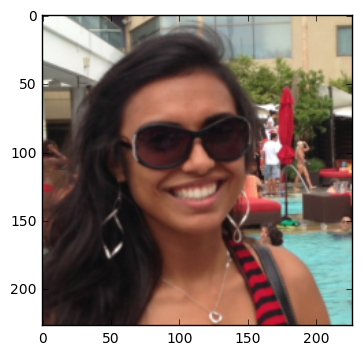

In [2]:
pickle_file = 'age_gender_unified_dataset.pickle'

with open(pickle_file, 'rb') as f:
  save = pickle.load(f)
  age_gender_dataset = save['age_gender_dataset']
  age_gender_labels = save['age_gender_labels']

  del save  # hint to help gc free up memory
  #print('Training set', train_dataset.shape, train_labels.shape)
  print ("len age_gender_dataset: {}, len age_gender_labels: {}".format(len(age_gender_dataset), 
                                                                        len(age_gender_labels)))
    
print("nage_gender feature Image : {} | \nage_gender Image label : {}".format(plt.imshow(age_gender_dataset[0]), 
                                                                              age_gender_labels[0]))
#print("age_gender_feature_list image Shape :", elt.shape)

In [3]:
statinfo = os.stat(pickle_file)
print('Compressed pickle size in Mo:', statinfo.st_size/(1024*1024))

Compressed pickle size in Mo: 2383.963970184326


<font color='red'>As explained in the report, we could move from the 2-HotModel to the TuplesModel (and vice-versa). </font>

In [4]:
def return_age_gender_class_from_2hot(two_hot_label):
    i=0
    age_position = 0
    gender_position = 0
    gender_label = 0
    for elt in two_hot_label:
        i +=1
        if elt == 1 and i<=8:
            age_position = i
        if elt == 1 and i>8:
            gender_position = i
    if gender_position == 9:
        gender_label = 0
    elif gender_position == 10:
        gender_label = 1
        
    return (age_position-1, gender_label)


In [5]:
# From 2-hotLabels to Tuples labels
age_gender_labels_tuples = []
for label in age_gender_labels:
    tuple_label = return_age_gender_class_from_2hot(label)
    age_gender_labels_tuples.append(tuple_label)

In [6]:
age_gender_labels_tuples[0]

(4, 1)

### Unified Dataset visualization

In [8]:
print("\n ******** Detailed Information about the Unified Dataset Benchmark *********  \n")
"""
Write a script on the Unified Dataset which return
for each age class:
- the number of male
- the number of female
- the total
"""
content_dic = {"Male":0, "Female":0} # Will totalize the content of the Unified_Dataset per class
Unified_Dataset = {"0-2":content_dic, "4-6":content_dic, "8-13":content_dic, "15-20":content_dic, 
                   "25-32":content_dic, "38-43":content_dic, "48-53":content_dic, "60-":content_dic}

def return_age_class_key(id):
    age_class_key_dic = {0:"0-2", 1:"4-6", 2:"8-13", 3:"15-20", 4:"25-32", 5:"38-43", 6:"48-53", 7:"60-"}
    return age_class_key_dic[id]

# Let's test the function
print("return_age_class_key test :", return_age_class_key(7))

# In the Adience Benchmark txt files, male are label with a 0, and female with a 1.
def return_Unified_Dataset_Details(age_gender_labels, Unified_Dataset):
    for value in age_gender_labels:
        age_class, gender_class = value
        current_class = return_age_class_key(int(age_class))
        #print("I got value JC : ", value)
        #print("current_class JC : ", current_class)
        
        
        
        if int(gender_class) == 0:
            current_content = Unified_Dataset[current_class]
            current_content_dic = current_content.copy()
            current_male_value = current_content_dic["Male"]
            #print("current_male_value : ", current_male_value)
            current_content_dic["Male"] = int(current_male_value) + 1
            #print("current_male_value After Update : ", current_male_value)
            Unified_Dataset[current_class] = current_content_dic
            current_content_dic = {}
        elif int(gender_class) == 1:
            current_content = Unified_Dataset[current_class]
            current_content_dic = current_content.copy()
            current_female_value = current_content_dic["Female"]
            current_content_dic["Female"] = int(current_female_value) + 1
            Unified_Dataset[current_class] = current_content_dic
            current_content_dic = {}
            
    return Unified_Dataset
            

Unified_Dataset_result = return_Unified_Dataset_Details(age_gender_labels_tuples, Unified_Dataset)

print("\nUnified Dataset Details :\n", Unified_Dataset_result)

total_number=0
for each_class in Unified_Dataset_result:
    content = Unified_Dataset_result[each_class]
    total_number += int(content['Male'])
    total_number += int(content['Female'])

print("\nTotal number of images : ", total_number)

print("\n ************ ********* **************  \n")


 ******** Detailed Information about the Unified Dataset Benchmark *********  

return_age_class_key test : 60-

Unified Dataset Details :
 {'38-43': {'Female': 1054, 'Male': 1239}, '0-2': {'Female': 681, 'Male': 716}, '15-20': {'Female': 907, 'Male': 733}, '48-53': {'Female': 433, 'Male': 392}, '4-6': {'Female': 1230, 'Male': 909}, '25-32': {'Female': 2575, 'Male': 2302}, '8-13': {'Female': 1188, 'Male': 929}, '60-': {'Female': 427, 'Male': 439}}

Total number of images :  16154

 ************ ********* **************  



In [9]:
Unified_Dataset_Dataframes = pd.DataFrame.from_dict(Unified_Dataset_result, orient='index')

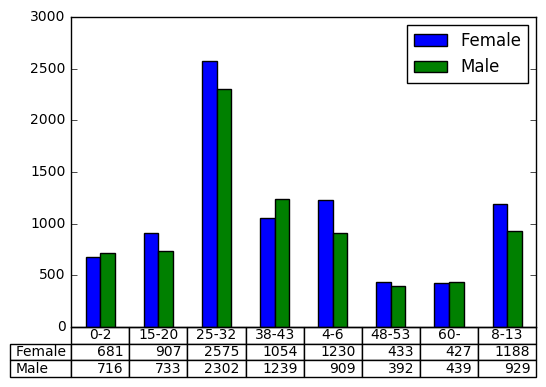

In [10]:
x_axis = Unified_Dataset_Dataframes.plot.bar(
    #title='Breakdown of the Unified Dataset benchmark into the different Age and Gender classes', 
    legend=True, sort_columns=True, table=True, use_index=False, sharex=False, xticks=None);
x_axis.get_xaxis().set_visible(False)

<a name="Training_Test_Sets_Creation"></a>
## I.2- Training and Test sets creation
Now, we will use the ***sklearn.model_selection.train_test_split*** tool to split the dataset into training and test sets.

In [12]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(age_gender_dataset, age_gender_labels_tuples, 
                                                    test_size=0.33, random_state=42)

In [15]:
print ("len X_train: {}, len X_test: {}, len y_train: {}, len y_test: {}".format(len(X_train), len(X_test), 
                                                                                 len(y_train), len(y_test)))

len X_train: 10823, len X_test: 5331, len y_train: 10823, len y_test: 5331


<font color='red'>**Separate age class list function**</font>

This function will be useful when building the ages ranges function after the prediction.

<font color='red'>Using the ***return_age_list*** function and the ***trained model*** applied on the training labels (y_train) or test labels (y_test), we should find for each class of age the prediction ranges (interval of prediction for the ages). Indeed, for each age class we could define the minimum and maximum value of prediction (interval of prediction for the ages). And finally return the age prediction ranges for all age classes. ***Nonetherveless, there is a risk of overlaping between age ranges if the model is not trained enough***.
<br/>As already explained in the report, another solution is to try different activation functions, other than the softmax, for the last layer. Or we could transform the labels.</font>


In [16]:
[i for i in range(8)]

[0, 1, 2, 3, 4, 5, 6, 7]

In [17]:
# This function returns separate ages list ids. For each age class, it returns its ids in the applied dataset.
# For example for the y_train it returns for each age class, its valid ids in a list. 
# FINALLY, all ids list per age class are returned in one list (A list of "ids per age class list").
# They are ranged in the correct order. So for example, you should apply 0 to this function output to find 
#the ids list of the first age class: 0.
def return_age_list(y_train):
    
    classes_to_return = [k for k in range(8)]
    separate_ages_list = []
    
    for class_to_return in classes_to_return:
        #print("Hi JC, I am in this class of age : ", class_to_return)
        i=0
        class_to_return_ids = []
        for age_gender in y_train:
            age_class, gender_class = age_gender
            if age_class == class_to_return:
                class_to_return_ids.append(i)

            i+=1
        
        #print("Hi JC, this is the age class ids N° : ", class_to_return_ids[:6])
        separate_ages_list.append(class_to_return_ids)

        
    return separate_ages_list

In [18]:
#return_age_list(y_train, X_train)
separate_ages_list_per_ids = return_age_list(y_train)

In [19]:
_0_ages_list = separate_ages_list_per_ids[0]

In [20]:
_0_ages_list[:5]

[20, 24, 58, 59, 73]

In [24]:
y_train[73]

(0, 0)

<font color='blue'>***MORE DETAILS ON THE training and test sets***</font>

**Detailed Information about the Unified Training and Test sets**


 ******** Detailed Information about the Unified Train set *********  


Unified TrainSet Details :
 {'38-43': {'Female': 703, 'Male': 803}, '0-2': {'Female': 452, 'Male': 474}, '15-20': {'Female': 595, 'Male': 501}, '48-53': {'Female': 314, 'Male': 279}, '4-6': {'Female': 812, 'Male': 614}, '25-32': {'Female': 1740, 'Male': 1540}, '8-13': {'Female': 805, 'Male': 631}, '60-': {'Female': 285, 'Male': 275}}

Total number of images :  10823


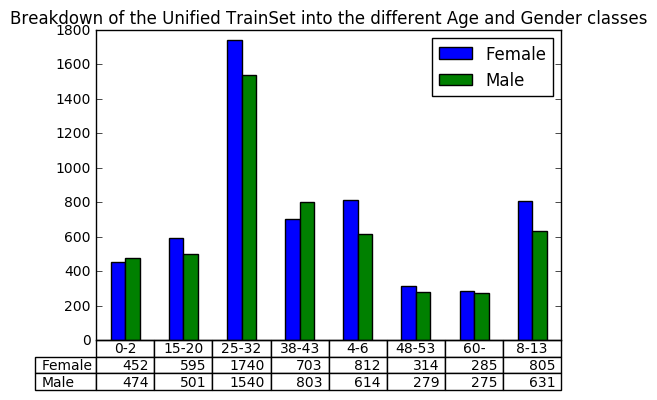

In [25]:
print("\n ******** Detailed Information about the Unified Train set *********  \n")
# First let's initialize the variables
content_dic = {"Male":0, "Female":0} # Will totalize the content of the Unified_Dataset per class
Unified_Dataset = {"0-2":content_dic, "4-6":content_dic, "8-13":content_dic, "15-20":content_dic, 
                   "25-32":content_dic, "38-43":content_dic, "48-53":content_dic, "60-":content_dic}


Unified_TrainSet_result = return_Unified_Dataset_Details(y_train, Unified_Dataset)


print("\nUnified TrainSet Details :\n", Unified_TrainSet_result)

total_number=0
for each_class in Unified_TrainSet_result:
    content = Unified_TrainSet_result[each_class]
    total_number += int(content['Male'])
    total_number += int(content['Female'])

print("\nTotal number of images : ", total_number)



Unified_TrainSet_Dataframes = pd.DataFrame.from_dict(Unified_TrainSet_result, orient='index')

x_axis = Unified_TrainSet_Dataframes.plot.bar(
    title='Breakdown of the Unified TrainSet into the different Age and Gender classes', 
    legend=True, sort_columns=True, table=True, use_index=False, sharex=False, xticks=None);
x_axis.get_xaxis().set_visible(False)


 ******** Detailed Information about the Unified Test set *********  


Unified TestSet Details :
 {'38-43': {'Female': 351, 'Male': 436}, '0-2': {'Female': 229, 'Male': 242}, '15-20': {'Female': 312, 'Male': 232}, '48-53': {'Female': 119, 'Male': 113}, '4-6': {'Female': 418, 'Male': 295}, '25-32': {'Female': 835, 'Male': 762}, '8-13': {'Female': 383, 'Male': 298}, '60-': {'Female': 142, 'Male': 164}}

Total number of images :  5331


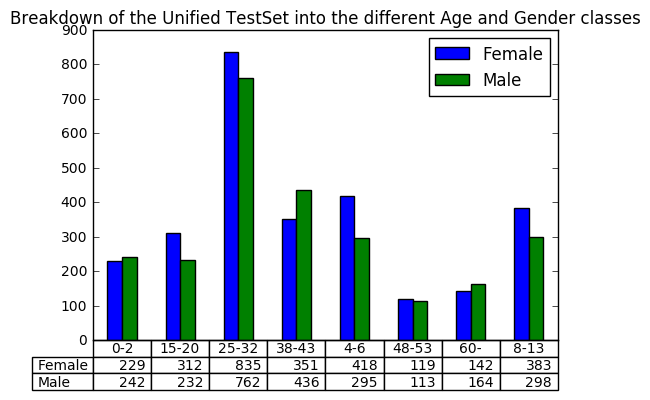

In [26]:
print("\n ******** Detailed Information about the Unified Test set *********  \n")
# First let's initialize the variables
content_dic = {"Male":0, "Female":0} # Will totalize the content of the Unified_Dataset per class
Unified_Dataset = {"0-2":content_dic, "4-6":content_dic, "8-13":content_dic, "15-20":content_dic, 
                   "25-32":content_dic, "38-43":content_dic, "48-53":content_dic, "60-":content_dic}


Unified_TestSet_result = return_Unified_Dataset_Details(y_test, Unified_Dataset)


print("\nUnified TestSet Details :\n", Unified_TestSet_result)

total_number=0
for each_class in Unified_TestSet_result:
    content = Unified_TestSet_result[each_class]
    total_number += int(content['Male'])
    total_number += int(content['Female'])

print("\nTotal number of images : ", total_number)

Unified_TestSet_Dataframes = pd.DataFrame.from_dict(Unified_TestSet_result, orient='index')

x_axis = Unified_TestSet_Dataframes.plot.bar(
    title='Breakdown of the Unified TestSet into the different Age and Gender classes', 
    legend=True, sort_columns=True, table=True, use_index=False, sharex=False, xticks=None);
x_axis.get_xaxis().set_visible(False)


<font color='blue'>***Functions for LABELS TRANSFORMATION and Interpretation***</font>

In [40]:
from sklearn import preprocessing

In [41]:
print('y_train[0] : ', y_train[0])

y_train[0] :  (0, 1)


In [42]:
lb = preprocessing.LabelBinarizer()

lb.fit(y_train[0])

lb.transform(y_train[0])

array([[0],
       [1]])

In [43]:
lb.classes_

array([0, 1])

In [44]:
lb.inverse_transform(lb.transform(y_train[0]))

array([0, 1])

In [45]:
def Labels_Binarizer(labels):
    lb = preprocessing.LabelBinarizer()
    lb.fit(labels)
    Binarized_labels = lb.transform(labels)
    
    return Binarized_labels

In [46]:
def Understandable_format(label):
    age, gender = label
    gender_label = ''
    if int(gender) ==0:
        gender_label = 'male'
    else:
        gender_label = 'female'
        
    age_class_label = return_age_class_key(int(age))
    if int(age)<7:
        next_age_class_label = return_age_class_key(int(age + 1))
    #next_age_class_label = return_age_class_key(int(age + 1))
    if int(age)==7:
        print("We have a {} equal or more than 60.".format(gender_label))
    else:
        print("We have a {} between {} and/or under {}.".format(gender_label, age_class_label, 
                                                                next_age_class_label.split('-')[0]))

In [47]:
def interpret_label_prediction(prediction_label):
    lb = preprocessing.LabelBinarizer()
    #Instantiate the classifier
    lb.fit(y_train[0])
    lb.transform(y_train[0])

    print('========== START PREDICTION INTERPRETATION ===========\n')
    print('Predicted label in tuples format : ', prediction_label)
    
    label_true_value = lb.inverse_transform(prediction_label)
    
    print('Predicted label interpretation : ', label_true_value)
    
    #Understandable_format(age_gender_true_values)
    
    print('\n========== END OF PREDICTION INTERPRETATION ===========\n')
    #return age_gender_true_values

In [51]:
# Test the binarized_y_train before the final ages_ranges function.
# Loop to recreate the binarized_y_train as the function can't be applied to Multioutput target data (not supported)
binarized_y_train = Labels_Binarizer(y_train[0])

In [52]:
binarized_y_train

array([[0],
       [1]])

<font color='blue'>***Functions for FEATURE TRANSFORMATION***</font>

**min_max_scaler**
<br/>It is possible to scale the features (images) before the training process and restore a scaled image

In [27]:
min_max_scaler = preprocessing.MinMaxScaler()

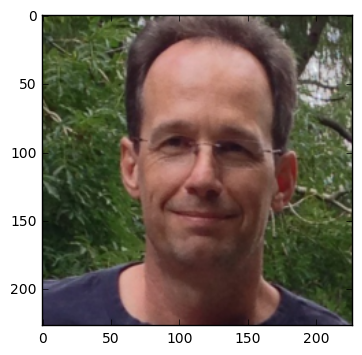

In [28]:
plt.imshow(X_train[1])

In [29]:
print('X_train[1] shape : ', X_train[1].shape)

X_train[1] shape :  (227, 227, 3)


In [30]:
X_train_minmax = min_max_scaler.fit_transform(X_train[1].reshape(1, -1))

C:\Anaconda3\envs\idp3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


X_train_minmax :  [[ 0.  0.  0. ...,  0.  0.  0.]]
X_train_minmax len :  1
X_train_minmax shape :  (1, 154587)


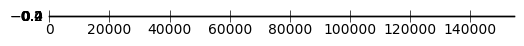

In [31]:
print('X_train_minmax : ', X_train_minmax)
print('X_train_minmax len : ', len(X_train_minmax))
print('X_train_minmax shape : ', X_train_minmax.shape)
plt.imshow(X_train_minmax)

In [32]:
X_train_recovered = min_max_scaler.inverse_transform(X_train_minmax)
print('X_train_recovered shape : ', X_train_recovered.shape)

X_train_recovered shape :  (1, 154587)


X_train_recovered shape :  (227, 227, 3)


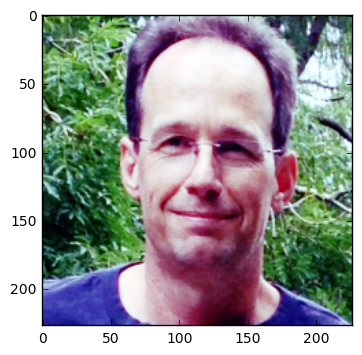

In [33]:
X_train_recovered = X_train_recovered.reshape((X_train[1].shape[0], X_train[1].shape[1], 3))

redChannel = exposure.equalize_hist(X_train_recovered[:, :, 0])
greenChannel = exposure.equalize_hist(X_train_recovered[:, :, 1])
blueChannel = exposure.equalize_hist(X_train_recovered[:, :, 2])
X_train_recovered = np.dstack((redChannel,greenChannel,blueChannel)) 

print('X_train_recovered shape : ', X_train_recovered.shape)
plt.imshow(X_train_recovered)

###### Recreate the scaled training set with min_max_scaler

In [ ]:
X_train_minmax = []
for image in X_train:
    scaled_image = min_max_scaler.fit_transform(image.reshape(1, -1))
    X_train_minmax.append(scaled_image)

In [ ]:
# To show the scaled image after prediction, refer to the indice.
image_indice = 129
image_sample = X_train_minmax[image_indice]

In [ ]:
X_train_recovered = image_sample
scaled_image = min_max_scaler.fit_transform(X_train[image_indice].reshape(1, -1))
X_train_recovered = min_max_scaler.inverse_transform(scaled_image)

In [ ]:
X_train_recovered = X_train_recovered.reshape((X_train[1].shape[0], X_train[1].shape[1], 3))

redChannel = exposure.equalize_hist(X_train_recovered[:, :, 0])
greenChannel = exposure.equalize_hist(X_train_recovered[:, :, 1])
blueChannel = exposure.equalize_hist(X_train_recovered[:, :, 2])
X_train_recovered = np.dstack((redChannel,greenChannel,blueChannel)) 

print('X_train_recovered shape : ', X_train_recovered.shape)
plt.imshow(X_train_recovered)

**Adding noise to the data**

In [34]:
X_train[0].min()

0

In [35]:
X_train[0].max()

165

In [ ]:
X_train_noise = np.array(X_train) + np.random.uniform(0,255,(len(X_train), X_train[1].shape[0]*X_train[1].shape[1]))

###### Recreate the scaled training set with 255

In [ ]:
#X_train_255 = np.divide(X_train, 255)

In [ ]:
#X_train_square = np.square(X_train_255)

In [ ]:
#X_train_sqrt = np.sqrt(X_train_255)

In [ ]:
X_train_reinforced = np.concatenate((X_train_255, X_train_square, X_train_sqrt), axis=0)

<font color='red'>So, you could try each training set (***X_train, X_train_noise, X_train_reinforced, X_train_minmax, etc.***) and pick the one with the best accuracy.<br/>***Often, the X_train_reinforced produce the best improvements.***</font>

<a name="Age_Gender_Prediction"></a>
# II- Age and Gender Prediction


the model will learn for each image in ***age_gender_feature_list*** its label (the corresponding one-hot label) in ***age_gender_label_list***. And it will be able to predict the labels on unseen images.


In this part, we will pass the time training an artificial neural network model to learn how to predict age and gender of unseen images. For this purposes, we will use the **X_train** and **y_train** we previously built. 
The model will learn for each image in ***X_train*** its label (the corresponding one-hot label) in ***y_train***. And so, it will be able to predict the labels on unseen images. It will generate a one-hot label of 10 dimensions. So, according to the value we will know the age and gender of the image.

- This step will be useful for the mobile App. For each image the app should give its gender and age, and then propose the user to chose a class for aging process on the same image.

<font color='red'><br/>Note: <br/>Here, remember that a model which works well could need **several days on a modern GPU to be trained**.<br/>So **it could take a long time to train a good model, moreover on CPU systems.**<br/>Because of this, we will save the training model for futur use.</font>

<a name="ANN_Model"></a>
## II.1- Build the Artificial Neural Network (ANN) Model
<a name="ANN_Model_TFlearn"></a>
### II.1.1- With TFLearn

In [ ]:
os.getcwd()
print("Current path: ", os.getcwd())

In [53]:
print("\n ************ START Build Artificial neural network Model TFLearn **************  \n")
# Build neural network
net = tflearn.input_data(shape=[None, 227, 227, 3])

net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 32)
net = tflearn.fully_connected(net, 16)
net = tflearn.fully_connected(net, 16)
net = tflearn.fully_connected(net, 10)
net = tflearn.fully_connected(net, 2, activation='softmax')

net = tflearn.regression(net, optimizer='adam', loss='categorical_crossentropy')

# Define model and setup tensorboard
tflearn_model = tflearn.DNN(net, tensorboard_dir='output/tflearn_logs', tensorboard_verbose=3)

# Start training (apply gradient descent algorithm)
print("len train_x : {} | len train_y : {}".format(len(X_train), len(y_train)))
tflearn_model.fit(X_train, y_train, n_epoch=20, batch_size=128, show_metric=True)

print("\n ************ END Build Artificial neural network Model With TFLearn **************  \n")


Training Step: 119  | total loss: 1.53463 | time: 3.993s
| Adam | epoch: 020 | loss: 1.53463 - acc: 0.9552 -- iter: 640/670
Training Step: 120  | total loss: 1.49281 | time: 4.754s
| Adam | epoch: 020 | loss: 1.49281 - acc: 0.9596 -- iter: 670/670
--

 ************ END Build Artificial neural network Model With TFLearn **************  



EXECUTE THIS TO SAVE THE MODEL

In [54]:
### MODEL BACKUP
tflearn_model.save('output/model.tflearn.tuples')

INFO:tensorflow:C:\Users\Jean-Claude KOUASSI\tensorflow-udacity\output\model.tflearn.tuples is not in all_model_checkpoint_paths. Manually adding it.


<a name="ANN_Model_Tensorflow"></a>
### II.1.2- With Tensorflow

In [55]:
#print(X_train[:1])

In [57]:
print("\n ************ START Build Artificial neural network Model With Tensorflow **************  \n")
### Here we will use tensorflow keras model, it accepts list and numpy arrays as tflearn
from tensorflow.contrib.keras.python.keras.layers.core import *
from tensorflow.contrib.keras.python.keras.models import Sequential
from tensorflow.contrib.keras.python.keras.models import Model


# This returns a tensor
inputs = tf.contrib.keras.layers.Input(shape=(154587,))


# a layer instance is callable on a tensor, and returns a tensor
x = Dense(32)(inputs)
x = Dense(32)(x)
x = Dense(16)(x)
x = Dense(16)(x)
x = Dense(10)(x)
predictions = Dense(2, activation='softmax')(x)

# This creates a model that includes
# the Input layer and three Dense layers
tf_model = Model(inputs=inputs, outputs=predictions)
tf_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Reshape it to map the content to the rest of the process
X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], 154587))
y_train = np.array(y_train)
print(y_train.shape)
y_train_new = y_train.copy()

# starts training
print(y_train_new.shape)
history = tf_model.fit(X_train, y_train_new, epochs=20, validation_split=0.1, batch_size=128, verbose=0) 
#history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)

print("\n ************ END Build Artificial neural network Model With Tensorflow **************  \n")


 ************ START Build Artificial neural network Model With Tensorflow **************  

(670, 2)
(670, 2)

 ************ END Build Artificial neural network Model With Tensorflow **************  



In [58]:
### MODEL BACKUP
filepath = 'output/model.tensorflow.tuples'
tf.contrib.keras.models.save_model(tf_model, filepath)


<a name="Model_Evaluation"></a>
## II.2- Models Evaluation
The Metrics used for Models Evaluation here are **loss and accuracy on the test set**.
We will also when possible print a visualization for a better understanding.

<a name="Model_Evaluation_TFlearn"></a>
### II.2.1- With TFLearn

In [59]:
### Run the command below in a terminal of the server where this notebook is executed 
### and see the result at http://192.168.99.100:6006/
#cd tensorflow/tensorflow/examples/udacity/
#tensorboard --logdir='tflearn_logs'

X_test = np.array(X_test)
y_test = np.array(y_test)
score = tflearn_model.evaluate(X_test, y_test, batch_size=128)
print(score)

[0.97272727272727277]


<a name="Model_Evaluation_Tensorflow"></a>
### II.2.2- With Tensorflow

In [60]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], 154587))
y_test = np.array(y_test)

score = tf_model.evaluate(X_test, y_test, batch_size=128)

330/330 [==============================] - 0s     


In [61]:
print(score)

[8.9870615063291606, 0.97272727272727277]


['acc', 'val_loss', 'val_acc', 'loss']


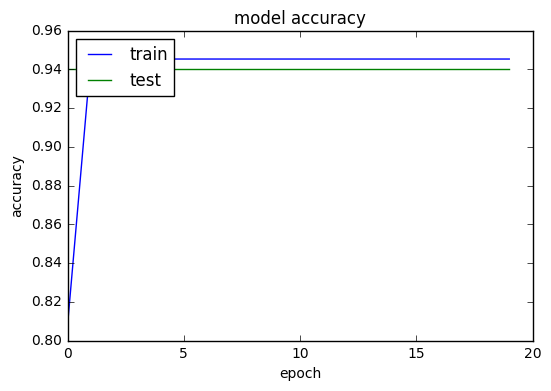

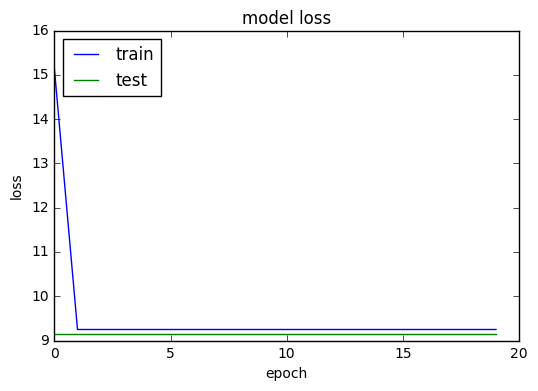

In [62]:
# Visualize training history
# http://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# list all data in history

print(list(history.history.keys()))
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<a name="Model_Prediction"></a>
## II.3- Prediction on the Models
<a name="Model_Prediction_TFlearn"></a>
### II.3.1- With TFLearn
<a name="prediction_on_dataset_TFlearn"></a>
#### II.3.1.1- With images from the dataset

In [63]:
print("\n\n ************ START Model Prediction  with TFLearn **************  \n")
images_to_plot = []

print("==============> WITH THE test dataset")
# Reshape for the plot function
image_to_predict = (X_test[0])[np.newaxis]
image_to_predict = np.reshape(image_to_predict, (227, 227, 3))

images_to_plot.append(image_to_predict)

# Reshape for the prediction model
image_to_predict = (image_to_predict)[np.newaxis]
print("test dataset image shape : ", image_to_predict.shape)
print("Label Prediction on the test dataset image : ", tflearn_model.predict(image_to_predict))
print("True Label Value : ", y_test[0])


for elt in images_to_plot:
    print("Images shapes for plot :")
    print(elt.shape) 




 ************ START Model Prediction  with TFLearn **************  

==============> WITH THE test dataset
test dataset image shape :  (1, 227, 227, 3)
Label Prediction on the test dataset image :  [[ 0.90521884  0.09478116]]
True Label Value :  [2 0]
Images shapes for plot :
(227, 227, 3)


In [64]:
prediction_label = tflearn_model.predict(image_to_predict)

In [65]:
interpret_label_prediction(prediction_label)

========== START PREDICTION INTERPRETATION ===========

Predicted label in tuples format :  [[ 0.90521884  0.09478116]]
Predicted label interpretation :  [0]

========== END OF PREDICTION INTERPRETATION ===========



<a name="prediction_on_otherFaces_TFlearn"></a>
#### II.3.1.2- With other face images

In [66]:
print("\n==============> WITH my own image")
# Prediction with my own image

if int(PyVersion[0])==2:
    data_dir_jc_photo = 'Kouassi-Jean-Claude-ID.png'
elif int(PyVersion[0])==3:
    data_dir_jc_photo = 'Kouassi-Jean-Claude-ID.png'

# Reshape for the plot function                
jc_image = plt.imread(data_dir_jc_photo)
jc_image = imresize(jc_image, (227, 227))
images_to_plot.append(jc_image)

# Reshape for the prediction model
jc_image = jc_image[np.newaxis]
jc_image = jc_image[:, :, :, :3]
print("jc_image shape : ", jc_image.shape)
print("Label Prediction with JC Photo: ", tflearn_model.predict(jc_image))
print("True Label Value : (4, 0)")



==============> WITH my own image
jc_image shape :  (1, 227, 227, 3)
Label Prediction with JC Photo:  [[ 0.99590009  0.0040999 ]]
True Label Value : (4, 0)


<a name="prediction_on_NonFaces_TFlearn"></a>
#### II.3.1.3- With non-faces images


==============> WITH a non-face image
other_image shape :  (1, 227, 227, 3)
Label Prediction with another image:  [[ 0.93431562  0.06568441]]
True Label Value : Here we have a picture of fishes
len images_to_plot : 3
Images shapes for plot :
(227, 227, 3)
Images shapes for plot :
(227, 227, 4)
Images shapes for plot :
(227, 227, 3)

 ************ END Model Prediction with TFLearn **************  



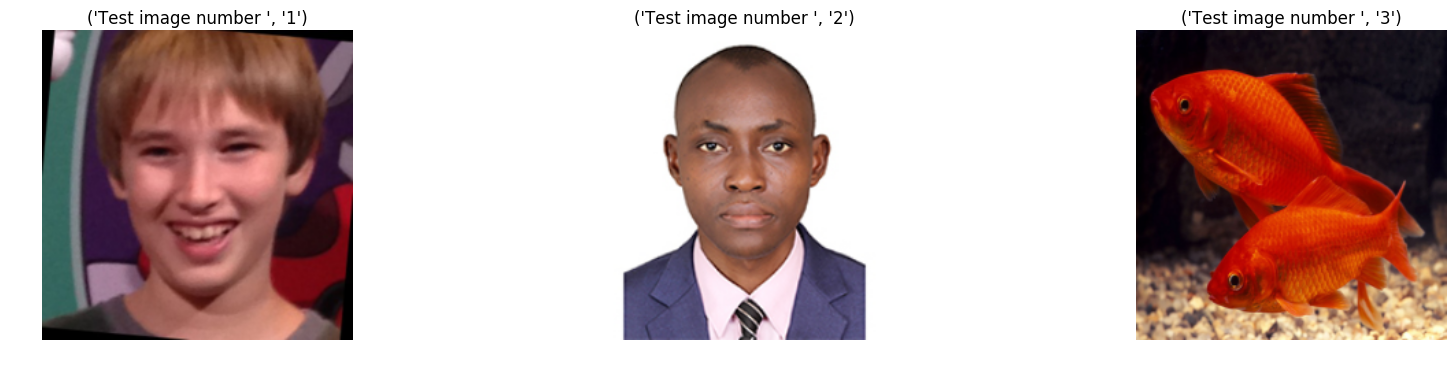

In [67]:
print("\n==============> WITH a non-face image")
# Prediction on unsuitable image (several faces, or animals)
if int(PyVersion[0])==2:
    data_dir_other = 'Fish.JPEG'
elif int(PyVersion[0])==3:
    data_dir_other = 'Fish.JPEG'

# Reshape for the plot function 
other_image = plt.imread(data_dir_other)
other_image = imresize(other_image, (227, 227))
images_to_plot.append(other_image)

# Reshape for the prediction model
other_image = other_image[np.newaxis]
print("other_image shape : ", other_image.shape)
print("Label Prediction with another image: ", tflearn_model.predict(other_image))
print("True Label Value : Here we have a picture of fishes")

print("len images_to_plot :", len(images_to_plot))

for elt in images_to_plot:
    print("Images shapes for plot :")
    print(elt.shape) 

fig, axs = plt.subplots(1, len(images_to_plot), figsize=(20, 4))
for i, ax_i in enumerate(axs):
    NewTitle = "Test image number ", str(i+1)
    ax_i.imshow(images_to_plot[i])
    ax_i.set_title(NewTitle)
    ax_i.grid('off')
    ax_i.axis('off')
    
print("\n ************ END Model Prediction with TFLearn **************  \n")


<a name="Model_Prediction_Tensorflow"></a>
### II.3.2- With Tensorflow 

<a name="prediction_on_dataset_Tensorflow"></a>
#### II.3.2.1- With images from the dataset

In [68]:
print("\n\n ************ START Model Prediction  with Tensorflow **************  \n")
print(X_test.shape)

Label = tf_model.predict(np.reshape(X_test[0], (1, 154587)))

print("Label Prediction : ", Label)
print("True Label Value : ", y_test[0])



 ************ START Model Prediction  with Tensorflow **************  

(330, 154587)
Label Prediction :  [[ 1.  0.]]
True Label Value :  [2 0]


<a name="prediction_on_otherFaces_Tensorflow"></a>
#### II.3.2.2- With other face images

In [69]:
print("Before reshape : ", jc_image.shape)
# So let's remove the Alpha channel on the blended image
# https://github.com/davisking/dlib/issues/128
jc_image = jc_image[:, :, :, :3]
print("After reshape : ", jc_image.shape)
score = tf_model.predict(np.reshape(jc_image, (1, 154587)))
print("Prediction score : ", score)
print("True Label Value : (4, 0)")

Before reshape :  (1, 227, 227, 3)
After reshape :  (1, 227, 227, 3)
Prediction score :  [[ 1.  0.]]
True Label Value : (4, 0)


<a name="prediction_on_NonFaces_Tensorflow"></a>
#### II.3.2.3- With non-faces images

In [70]:
print(other_image.shape)

score = tf_model.predict(np.reshape(other_image, (1, 154587)))
print("Prediction score : ", score)
print("True Label Value : Here we have a picture of fishes")

print("\n\n ************ END Model Prediction with Tensorflow **************  \n")

(1, 227, 227, 3)
Prediction score :  [[ 1.  0.]]
True Label Value : Here we have a picture of fishes


 ************ END Model Prediction with Tensorflow **************  



<a name="Improvement"></a>
## II.4- Improvement

<a name="Improvement_TFlearn"></a>
### II.4.1- With TFLearn

**The improved model**

In [ ]:
print("\n ************ START Build Improved Artificial neural network Model with TFLearn **************  \n")
# https://github.com/tflearn/tflearn/blob/master/examples/basics/finetuning.py
# Build neural network
net = tflearn.input_data(shape=[None, 227, 227, 3])

net = tflearn.fully_connected(net, 128, activation='tanh', regularizer='L2')
net = tflearn.fully_connected(net, 64, activation='tanh', regularizer='L2')
net = tflearn.fully_connected(net, 32, activation='tanh', regularizer='L2')
net = tflearn.fully_connected(net, 32, activation='tanh', regularizer='L2')
net = tflearn.fully_connected(net, 16, activation='tanh', regularizer='L2')
net = tflearn.layers.core.dropout(net, 0.8)
net = tflearn.fully_connected(net, 16, activation='tanh', regularizer='L2')
net = tflearn.layers.core.dropout(net, 0.8)
net = tflearn.fully_connected(net, 2, activation='softmax')


with tf.name_scope('CustomMonitor'):
    test_var = tf.reduce_sum(tf.cast(net, tf.float32), name="test_var")
    test_const = tf.constant(32.0, name="custom_constant")

net = tflearn.regression(net, optimizer='adam', loss='categorical_crossentropy', 
                         learning_rate=0.001, name='target', validation_monitors=[test_var, test_const])

# Define model and setup tensorboard
tflearn_improved_model = tflearn.DNN(net, tensorboard_dir='tflearn_logs', tensorboard_verbose=3)

# Start training (apply gradient descent algorithm)
print("len train_x : {} | len train_y : {}".format(len(X_train), len(y_train)))

tflearn_improved_model.fit(X_train, y_train, n_epoch=3000, batch_size=128, show_metric=True, validation_set=0.3)

print("\n ************ END Build Improved Artificial neural network Model with TFLearn **************  \n")


In [ ]:
# USEFUL INFORMATION FOR TUNING

# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# tflearn.layers.core.dropout (incoming, keep_prob, noise_shape=None, name='Dropout')


# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Activation and Regularization inside a layer:
# fc2 = tflearn.fully_connected(fc1, 32, activation='tanh', regularizer='L2')

#tflearn.layers.core.fully_connected (incoming, n_units, activation='linear', bias=True, weights_init='truncated_normal', 
#                                     bias_init='zeros', regularizer=None, weight_decay=0.001, trainable=True, restore=True, 
#                                     reuse=False, scope=None, name='FullyConnected')


# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Fully Connected Highway
# The dropout operation keeps the probabilities between layers
#tflearn.layers.core.highway (incoming, n_units, activation='linear', transform_dropout=None, weights_init='truncated_normal', 
#                             bias_init='zeros', regularizer=None, weight_decay=0.001, trainable=True, restore=True, 
#                             reuse=False, scope=None, name='FullyConnectedHighway')


# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
#tflearn.layers.estimator.regression (incoming, placeholder='default', optimizer='adam', 
#                                     loss='categorical_crossentropy', metric='default', learning_rate=0.001, 
#                                     dtype=tf.float32, batch_size=64, shuffle_batches=True, to_one_hot=False, 
#                                     n_classes=None, trainable_vars=None, restore=True, op_name=None, 
#                                     validation_monitors=None, validation_batch_size=None, name=None)


# ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Validation_monitors
# In practice, the validation monitor may present useful information, like confusion matrix entries, or an AUC metric.
#with tf.name_scope('CustomMonitor'):
#    test_var = tf.reduce_sum(tf.cast(network, tf.float32), name="test_var")
#    test_const = tf.constant(32.0, name="custom_constant")

#network = regression(network, optimizer='adam', learning_rate=0.01,
#                                 loss='categorical_crossentropy', name='target', validation_monitors=[test_var, test_const])


# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# Training
#fit (X_inputs, Y_targets, n_epoch=10, validation_set=None, show_metric=False, batch_size=None, shuffle=None, 
#     snapshot_epoch=True, snapshot_step=None, excl_trainops=None, validation_batch_size=None, run_id=None, callbacks=[])


In [ ]:
### MODEL BACKUP
tflearn_improved_model.save('output/improved.model.tflearn.tuples')

**Evaluation**

In [ ]:
### Run the command below in a terminal of the server where this notebook is executed 
### and see the result at http://192.168.99.100:6006/
#cd tensorflow/tensorflow/examples/udacity/
#tensorboard --logdir='tflearn_logs'


In [ ]:
X_test = np.array(X_test)
y_test = np.array(y_test)
score = tflearn_improved_model.evaluate(X_test, y_test, batch_size=128)
print(score)

**Predictions**

In [ ]:
print("\n\n ************ START Improved Model Prediction with TFLearn **************  \n")
images_to_plot = []

print("==============> WITH THE test dataset")
# Reshape for the plot function 
image_to_predict = (X_test[0])[np.newaxis]
image_to_predict = np.reshape(image_to_predict, (227, 227, 3))
images_to_plot.append(image_to_predict)

# Reshape for the prediction model
image_to_predict = (image_to_predict)[np.newaxis]
print("test dataset image shape : ", image_to_predict.shape)
print("Label Prediction on the test dataset image : ", tflearn_improved_model.predict(image_to_predict))
print("True Label Value : ", y_test[0])

for elt in images_to_plot:
    print("Images shapes for plot :")
    print(elt.shape) 

In [ ]:
print("\n==============> WITH my own image")
# Prediction with my own image

if int(PyVersion[0])==2:
    data_dir_jc_photo = 'Kouassi-Jean-Claude-ID.png'
elif int(PyVersion[0])==3:
    data_dir_jc_photo = 'Kouassi-Jean-Claude-ID.png'

# Reshape for the plot function 
jc_image = plt.imread(data_dir_jc_photo)
jc_image = imresize(jc_image, (227, 227))
images_to_plot.append(jc_image)

# Reshape for the prediction model
jc_image = jc_image[np.newaxis]
jc_image = jc_image[:, :, :, :3]
print("jc_image shape : ", jc_image.shape)
print("Label Prediction with JC Photo: ", tflearn_improved_model.predict(jc_image))
print("True Label Value : (4, 0)")

In [ ]:
print("\n==============> WITH a non-face image")
# Prediction on unsuitable image (several faces, or animals)
if int(PyVersion[0])==2:
    data_dir_other = 'Fish.JPEG'
elif int(PyVersion[0])==3:
    data_dir_other = 'Fish.JPEG'

# Reshape for the plot function 
other_image = plt.imread(data_dir_other)
other_image = imresize(other_image, (227, 227))
images_to_plot.append(other_image)

# Reshape for the prediction model
other_image = other_image[np.newaxis]
print("other_image shape : ", other_image.shape)
print("Label Prediction with another image: ", tflearn_improved_model.predict(other_image))
print("True Label Value : Here we have a picture of fishes")

print("len images_to_plot :", len(images_to_plot))

for elt in images_to_plot:
    print("Images shapes for plot :")
    print(elt.shape) 

fig, axs = plt.subplots(1, len(images_to_plot), figsize=(20, 4))
for i, ax_i in enumerate(axs):
    NewTitle = "Test image number ", str(i+1)
    ax_i.imshow(images_to_plot[i])
    ax_i.set_title(NewTitle)
    ax_i.grid('off')
    ax_i.axis('off')
    
print("\n ************ END Improved Model Prediction with TFLearn **************  \n")

<a name="Improvement_Tensorflow"></a>
### II.4.2- With Tensorflow

**The improved model**

In [92]:
print("\n ************ START Build Improved Artificial neural network Model with Tensorflow **************  \n")

from tensorflow.contrib.keras.python.keras.layers.core import *
from tensorflow.contrib.keras.python.keras.models import Sequential
from tensorflow.contrib.keras.python.keras.models import Model
from tensorflow.contrib.keras.python.keras.regularizers import l2
from tensorflow.contrib.keras.python.keras.constraints import max_norm
from tensorflow.contrib.keras.python.keras.optimizers import SGD

tf_improved_model = Sequential()
tf_improved_model.add(Dense(128, activation='relu', input_shape=(154587,)))
tf_improved_model.add(Dense(64, activation='relu', kernel_regularizer=l2(l=0.01)))
tf_improved_model.add(Dense(32, activation='relu', kernel_regularizer=l2(l=0.01)))
tf_improved_model.add(Dense(32, activation='relu', kernel_regularizer=l2(l=0.01)))
tf_improved_model.add(Dense(16, activation='relu', kernel_regularizer=l2(l=0.01)))
tf_improved_model.add(Dense(16, activation='relu', kernel_regularizer=l2(l=0.01)))
tf_improved_model.add(Dropout(0.8))
tf_improved_model.add(Dense(10, activation='relu', kernel_regularizer=l2(l=0.01)))
tf_improved_model.add(Dropout(0.8))
tf_improved_model.add(Dense(2, activation='softmax', kernel_regularizer=l2(l=0.01)))
#tf_improved_model.add(Dense(2, activation='relu', kernel_regularizer=l2(l=0.01)))


tf_improved_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Reshape it to map the content to the rest of the process
X_train = np.array(X_train)
X_train = np.reshape(X_train, (X_train.shape[0], 154587))
y_train = np.array(y_train)
print(y_train.shape)
y_train_new = y_train.copy()
print(y_train_new.shape)

# starts training
history = tf_improved_model.fit(X_train, y_train_new, validation_split=0.3, epochs=20, batch_size=128, verbose=0)  

print("\n ************ END Build Improved Artificial neural network Model with Tensorflow **************  \n")


 ************ START Build Improved Artificial neural network Model with Tensorflow **************  

(670, 2)
(670, 2)

 ************ END Build Improved Artificial neural network Model with Tensorflow **************  



In [93]:
# USEFUL INFORMATION FOR TUNING

# +++++++++++++++++++++++++++++++++++++++++++++++++++++
# model.add(Dropout(0.5))
# tf.contrib.keras.layers.add(inputs, **kwargs)

# +++++++++++++++++++++++++++++++++++++++++++++++++++++
# Dropout: A Simple Way to Prevent Neural Networks from Overfitting
# http://www.cs.toronto.edu/~rsalakhu/papers/srivastava14a.pdf
# keras.layers.core.Dropout(rate, noise_shape=None, seed=None)



# +++++++++++++++++++++++++++++++++++++++++++++++++++++
# keras.layers.core.Dense(units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', 
#                        kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, 
#                        bias_constraint=None)



# +++++++++++++++++++++++++++++++++++++++++++++++++++++
# compile(self, optimizer, loss, metrics=None, loss_weights=None, sample_weight_mode=None)

# +++++++++++++++++++++++++++++++++++++++++++++++++++++
#fit(self, x=None, y=None, batch_size=32, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
#    validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0)

In [94]:
### MODEL BACKUP
filepath = 'output/improved.model.tensorflow.tuples'
tf.contrib.keras.models.save_model(tf_improved_model, filepath)

**Evaluation**

In [95]:
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], 154587))
y_test = np.array(y_test)

score = tf_improved_model.evaluate(X_test, y_test, batch_size=128)
print(score)

330/330 [==============================] - 0s     
[10.40949917417584, 0.97272727272727277]


['acc', 'val_loss', 'val_acc', 'loss']


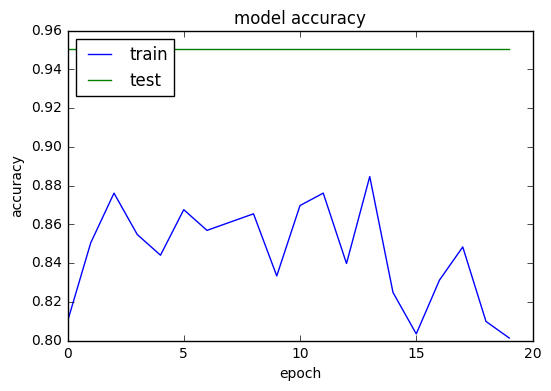

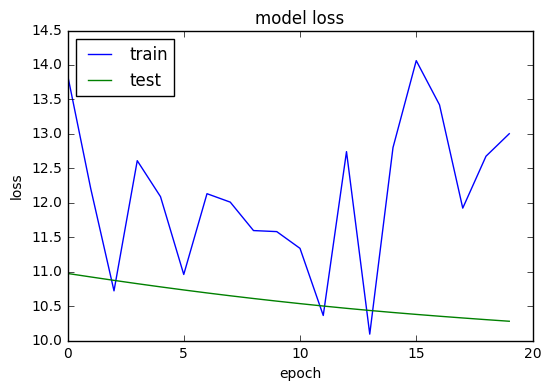

In [96]:
# Visualize training history
# http://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# list all data in history

print(list(history.history.keys()))
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Predictions**

In [97]:
print("\n\n ************ START Improved Model Prediction  with Tensorflow **************  \n")

### With images from the dataset

print(X_test.shape)

Label = tf_improved_model.predict(np.reshape(X_test[0], (1, 154587)))

print("Label Prediction : ", Label)
print("True Label Value : ", y_test[0])



 ************ START Improved Model Prediction  with Tensorflow **************  

(330, 154587)
Label Prediction :  [[ 1.  0.]]
True Label Value :  [2 0]


In [98]:
### With other face images

print("Before reshape : ", jc_image.shape)
# So let's remove the Alpha channel on the blended image
# https://github.com/davisking/dlib/issues/128
jc_image = jc_image[:, :, :, :3]
print("After reshape : ", jc_image.shape)
score = tf_improved_model.predict(np.reshape(jc_image, (1, 154587)))
print("Prediction score : ", score)
print("True Label Value : (4, 0)")

Before reshape :  (1, 227, 227, 3)
After reshape :  (1, 227, 227, 3)
Prediction score :  [[ 1.  0.]]
True Label Value : (4, 0)


In [99]:
### With non-faces images

print(other_image.shape)

score = tf_improved_model.predict(np.reshape(other_image, (1, 154587)))
print("Prediction score : ", score)
print("True Label Value : Here we have a picture of fishes")

print("\n\n ************ END Improved Model Prediction with Tensorflow **************  \n")

(1, 227, 227, 3)
Prediction score :  [[ 1.  0.]]
True Label Value : Here we have a picture of fishes


 ************ END Improved Model Prediction with Tensorflow **************  



**REUSE SAVED MODELS**

In [ ]:
# Before the fit to train on, or use alone and start to predict on.
### 1- TFLEARN
# tflearn_improved_model = tflearn_improved_model.load('output/improved.model.tflearn')

### 2- TENSORFLOW
#filepath = 'output/improved.model.tensorflow'
#tf_improved_model = tf.contrib.keras.models.load_model(filepath)


<a name="Age_Gender_Application"></a>
# III- Age and Gender Application (Optional)
      - Resources for Desktop, Mobile and Web Application


***Several possibilities to run the App on videos:***
- Using the [MoviePy](http://zulko.github.io/moviepy/index.html) Python module for video editing. It works on Windows, Mac, and Linux, with Python 2 or Python 3.
- [Python Live Video Streaming Example](http://www.chioka.in/python-live-video-streaming-example/)
- Using [scikit-video](https://github.com/aizvorski/scikit-video), a Video processing algorithms, including I/O, quality metrics, temporal filtering, motion/object detection, motion estimation...
- Using the [Continuous online video classification with TensorFlow](https://medium.com/@harvitronix/continuous-online-video-classification-with-tensorflow-inception-and-a-raspberry-pi-785c8b1e13e1) post on medium. The [Part2](https://medium.com/@harvitronix/continuous-video-classification-with-tensorflow-inception-and-recurrent-nets-250ba9ff6b85) includes examples on how to reuse TFLearn saved models.
- Applying the acgGAN function to **openCV** functions as in the [Udacity-Self-Driving-Car-Preview](https://github.com/Kjeanclaude/Udacity-SDC-Preview); look at the video part.


***Now on Mobile:***
<font color='red'><br/>There is not enough documentation for this task as I explained in the introduction. <br/>But we could find for Tensorflow some recents posts it is worth to try (almost all of them posted in March 2017).<br/>**Other methods are welcome, mostly universal methods (crossplatform supporting several Deep Learning frameworks).**</font>

- [Deploying a TensorFlow model to Android](https://chatbotslife.com/deploying-a-tensorflow-model-to-android-69d04d1b0cba)
- [Creating Custom Model For Android Using TensorFlow](https://blog.mindorks.com/creating-custom-model-for-android-using-tensorflow-3f963d270bfb)
- Tensorflow codelabs:
  - [TensorFlow for Poets 1](https://codelabs.developers.google.com/codelabs/tensorflow-for-poets/index.html#0)
  - [TensorFlow for Poets 2: Optimize for Mobile](https://codelabs.developers.google.com/codelabs/tensorflow-for-poets-2/#0)
  

***Below the intending functionalities of the App:***
- Select a picture or take a video with your phone
- The App give the gender and age of the picture (For instance, "It seems that we have a 30 years old Woman in this picture")


<a name="Discussion"></a>
# IV- Discussion

### Improvement
We will try to increase the quality of images as we can (It is the challenge the original paper tried to overcome).
We should try to provide result closer to below (even if we could not have the same accuracy because of amount of data and class of ages available with platform such as Microsoft, Facebook, etc.).
- For the age and gender prediction on unseen images : https://how-old.net/ (Microsoft). It is very accurate.    
    
    
### Framework limitation
Tools we used to train and evaluate the dataset could have an influence on the result. For example, the use of a DNNClassifier or a Keras on Tensorflow has different requirements. The dataset structure should be a dictionary for one, and a list for another. So it would be interesting to evaluate all the possibilities and compare how accurate improvement there is for each use case.

### Future work

- it would be worth to apply the same technic on other types of ANN such as GAN, as it is a recent field always in exploration, ***mainly the Wasserstein GAN*** which produces accurate results.
- propose an ***universal and easy method*** for deployment of notebook implementations on a Mobile App

<a name="conclusion"></a>
# CONCLUSION

We are thankful to Udacity for this effective Machine Learning Engineer Program. We have learned a lot of things and ready to go and apply them to professionnal and personal objectives projects.

We also thank the authors of the research paper which inspired our work, [Age and gender classification using convolutional neural networks](http://www.openu.ac.il/home/hassner/projects/cnn_agegender/CNN_AgeGenderEstimation.pdf). Even if they have different objectives, the provided dataset have been very helpful to perform this work. While they used CNN on separate prediction of gender and age, we used FCNs for a pixel-wise precision for both age and gender prediction on the same image, in a unique process.

This work could be used as a tutorial for anyone interesting in this field.

The main contribution had been:
- Provide simple and easy to use tools for dataset preprocessing, **considering different Machine Learning Frameworks requirements**.
- Assemble the prediction process in one step for both predictions, age and gender.
- Turning the implementation in video and mobile application
- Models' performances : 96% accuracy with the tuples model and about 60% of exact accuracy with the 2-hot labels model.

This capstone project allowed us to use tools provided by the MLND (Machine Learning Engineer Nanodegree Program) for the Machine Learning Process, especially :
    - Supervised Classification
    - Data Exploration
        --> Feature Observation : Identify and build feature and target columns from the dataset.
        Using labeled images (the Adience benchmark, we have been able to recreate a new Unified dataset 
        of new features and labels to fit our model)
    - Performance Metric (Loss and Accuracy Scores)
    - Shuffle and Split Data : Training and Testing Data Split (sklearn train_test_split tool)
    - Training Models (TFLearn and Tensorflow Keras models)
    - Model Evaluation and Validation (Loss and Accuracy)
    - Analyzing Model Performance (Tensorboard and Training history Visualization)
        --> Learning Curves
        --> Complexity Curves
    - Making Predictions (of correct labels)
    - Model Optimization - Model Tuning (optimizer, activation, loss and regularization functions, number of epoch, etc. )
    - Training computational cost (Big-O complexities of common algorithms used in Computer Science)


One of the Udacity statement is about the lifelong learning; so after this MLND, as we are involved in Cognitive Computing Research, it will be a solid basis to continue training in the field and reach the goal of Senior Cognitive Computing Researcher.

<font color='red'><br/>So, we are pleased to share this work with you. As it is said that there is no perfect human work, we are open to comment or suggestion. <br/>Any positive or negative feedback are welcome.<br/>Thank you !. <br/>==> <a href="https://github.com/Kjeanclaude">K. Jean-Claude</a><br/></font>

<font color='green'><br/>“Intellectuals solve problems, geniuses prevent them.” <br/>“The difference between stupidity and genius is that genius has its limits.”<br/><a href="http://www.movemequotes.com/top-21-albert-einstein-quotes/">Albert-Einstein</a><br/></font>